In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

apple = pd.read_csv("gdrive/MyDrive/Colab/AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [ ]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [ ]:
apple['Close'] = apple['Close'].shift(-1)
apple = apple.dropna()

In [ ]:
apple['Date']

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
9903    2020-03-25
9904    2020-03-26
9905    2020-03-27
9906    2020-03-30
9907    2020-03-31
Name: Date, Length: 9908, dtype: object

In [ ]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9.908000e+03
mean,32.585261,32.914300,32.256682,32.621270,30.555341,8.583339e+07
std,58.379165,58.964709,57.848636,58.473961,56.709776,8.597526e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048393,1.071429,0.917629,3.304172e+07
50%,1.727500,1.758929,1.696429,1.732143,1.465487,5.766545e+07
75%,35.788215,36.259284,35.255715,35.767858,31.029356,1.070020e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


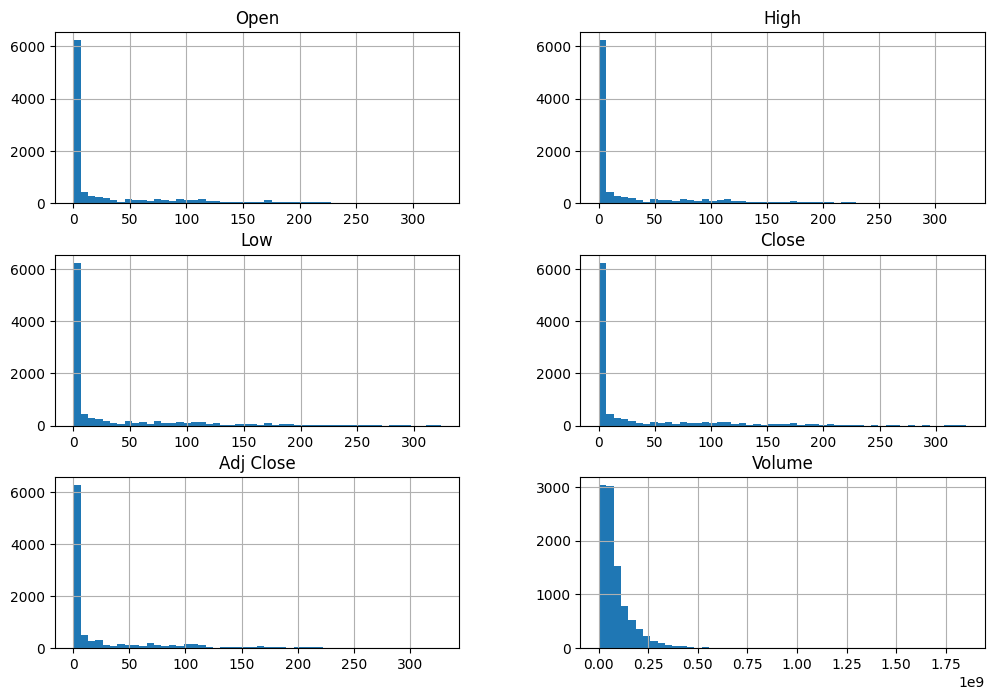

In [ ]:
import matplotlib.pyplot as plt
apple.hist(bins=50, figsize=(12, 8))
plt.show()

## Discover and Visualize the Data to Gain Insights
1. Looking for Correlations
2. Visualize Closing Price

In [ ]:
#Looking for Correlations
corr_matrix = apple.corr()
corr_matrix

<ipython-input-8-ee52173e7138>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = apple.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999935,0.999932,0.999659,0.998932,-0.133259
High,0.999935,1.000000,0.999887,0.999699,0.999040,-0.132207
Low,0.999932,0.999887,1.000000,0.999710,0.998991,-0.134958
Close,0.999659,0.999699,0.999710,1.000000,0.998832,-0.133570
Adj Close,0.998932,0.999040,0.998991,0.998832,1.000000,-0.142530
Volume,-0.133259,-0.132207,-0.134958,-0.133570,-0.142530,1.000000


In [ ]:
corr_matrix["Close"].sort_values(ascending=False)

Close        1.000000
Low          0.999710
High         0.999699
Open         0.999659
Adj Close    0.998832
Volume      -0.133570
Name: Close, dtype: float64

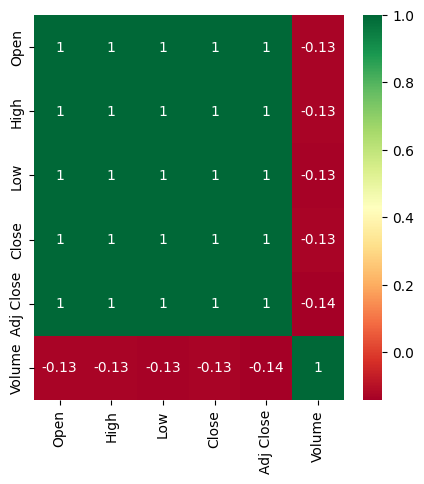

In [ ]:
import seaborn as sns
top_corr_features = corr_matrix.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(apple[top_corr_features].corr(),annot=True,cmap="RdYlGn")

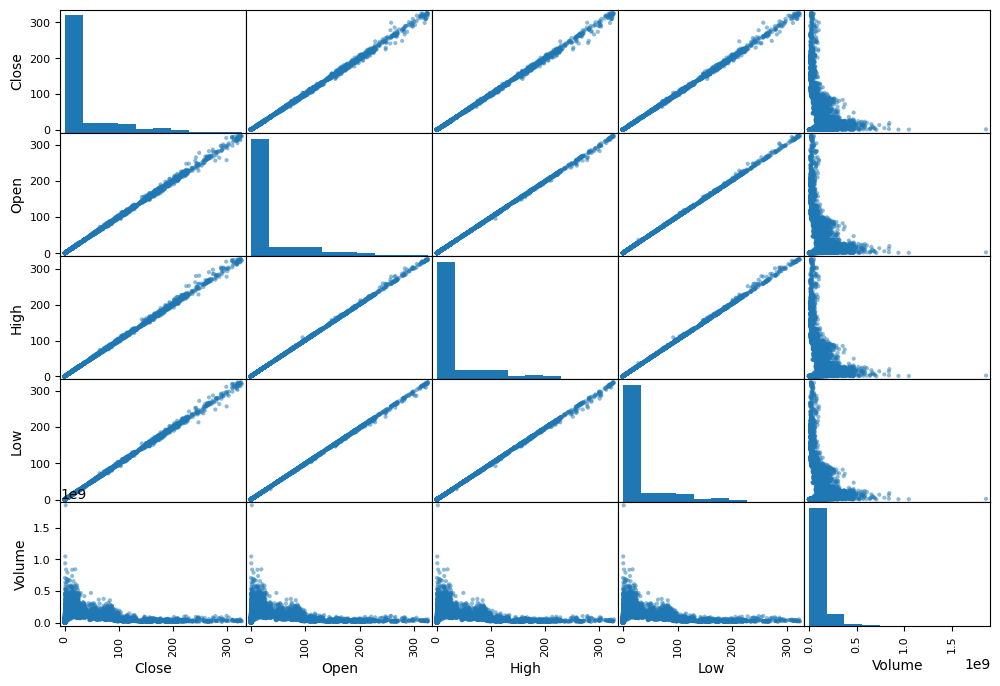

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Close", "Open", "High", "Low","Volume"]
scatter_matrix(apple[attributes], figsize=(12, 8))
plt.show()

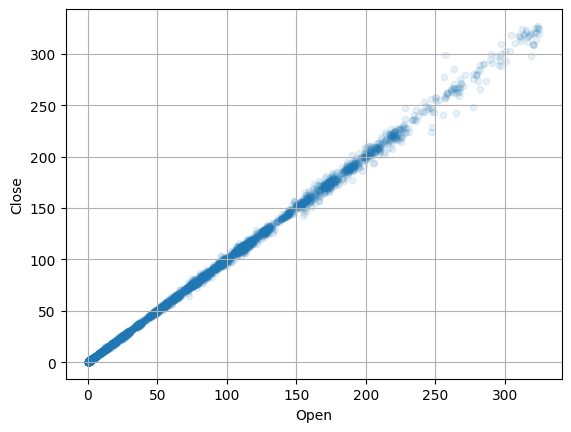

In [ ]:
apple.plot(kind="scatter", x="Open", y="Close",
             alpha=0.1, grid=True)
plt.show()

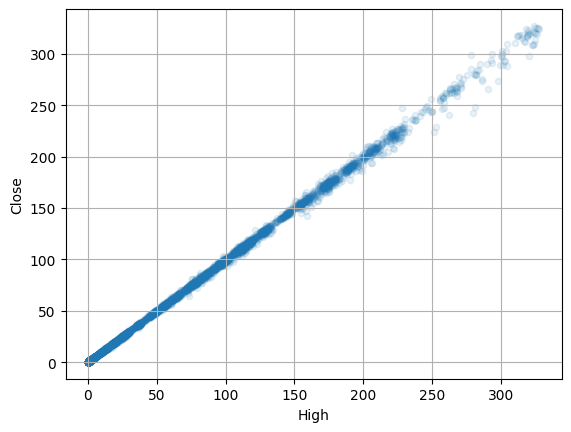

In [ ]:
apple.plot(kind="scatter", x="High", y="Close",
             alpha=0.1, grid=True)
plt.show()

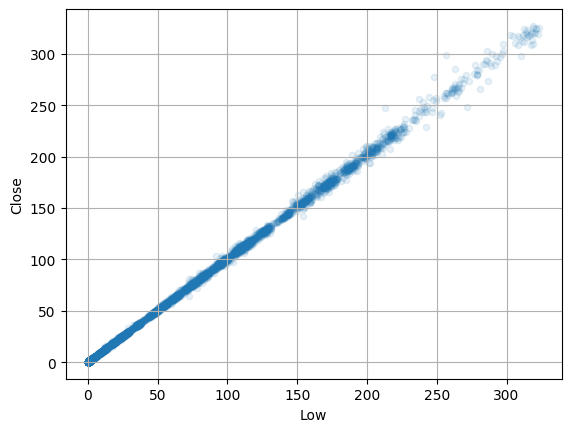

In [ ]:
apple.plot(kind="scatter", x="Low", y="Close",
             alpha=0.1, grid=True)
plt.show()

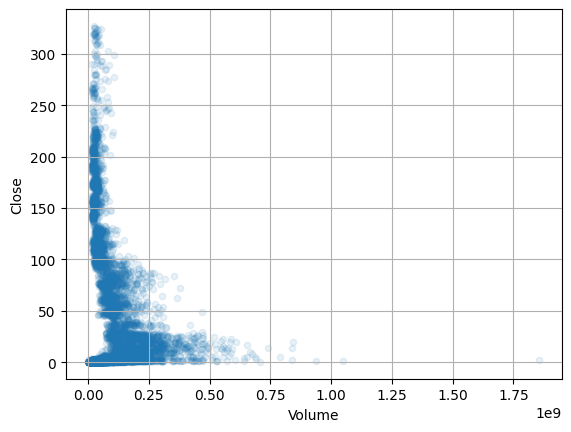

In [ ]:
apple.plot(kind="scatter", x="Volume", y="Close",
             alpha=0.1, grid=True)
plt.show()

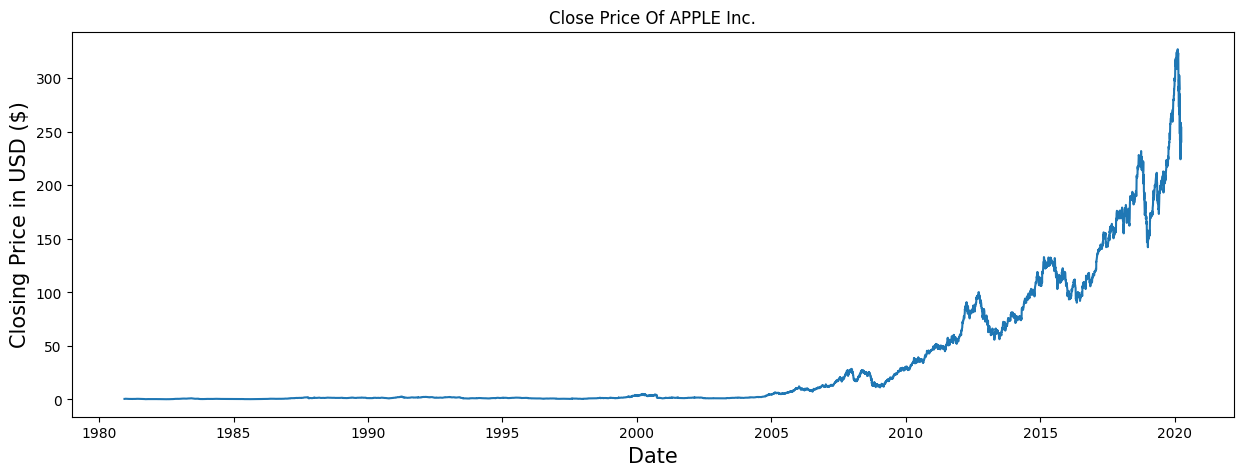

In [ ]:
# Visualize Closing Price
plt.figure(figsize = (15, 5))
apple["Date"] = pd.to_datetime(apple.Date, format="%Y-%m-%d")
apple.index = apple['Date']
plt.title("Close Price Of APPLE Inc.")
plt.plot(apple['Close'])
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Closing Price in USD ($)', fontsize = 15)
plt.show()

## Prepare the Data for Machine Learning Algorithms
1. Data Cleaning
2. Handling Text and Categorical Attributes
3. Feature Scaling

In [ ]:
X = apple.drop("Close", axis=1)
y = apple["Close"]
X_train, X_test, y_train, y_test = X[:8500], X[8500:], y[:8500], y[8500:]

In [ ]:
# Drop the "Adj Close" column
X_train.drop("Adj Close", axis=1, inplace=True)
X_train

<ipython-input-17-66290ec15089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop("Adj Close", axis=1, inplace=True)


,Date,Open,High,Low,Volume
0,1980-12-12,0.513393,0.515625,0.513393,117258400
1,1980-12-15,0.488839,0.488839,0.486607,43971200
2,1980-12-16,0.453125,0.453125,0.450893,26432000
3,1980-12-17,0.462054,0.464286,0.462054,21610400
4,1980-12-18,0.475446,0.477679,0.475446,18362400
...,...,...,...,...,...
8495,2014-08-20,100.440002,101.089996,99.949997,52699000
8496,2014-08-21,100.570000,100.940002,100.110001,33478000
8497,2014-08-22,100.290001,101.470001,100.190002,44184000
8498,2014-08-25,101.790001,102.169998,101.279999,40270000


In [ ]:
# Prepreprocessing the data
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

num_attribs = ["High", "Low", "Volume"]
cat_attribs = ["Date"]

num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

##Train Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = make_pipeline(preprocessing, RandomForestRegressor())
rf_reg.fit(X_train, y_train)

# Default Parameters:
# n_estimators, default=100
# max_depth, default=None
# min_samples_split, default=2
# min_samples_leaf, default=1
# max_leaf_nodes, default=None
# bootstrap, default=True

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['High', 'Low', 'Volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Date'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
rf_predictions = rf_reg.predict(X_train)
rf_predictions[:5].round(-2)

array([0., 0., 0., 0., 0.])

In [ ]:
from sklearn.metrics import mean_squared_error

rf_rmse = mean_squared_error(y_train, rf_predictions,
                              squared=False)
rf_rmse

0.19102252951327575

## Fine-tune Random Forest Regressor

In [ ]:
rf_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomforestregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__num', 'columntransformer__cat', 'columntransformer__num__memory', 'columntransformer__num__steps', 'columntransformer__num__verbose', 'columntransformer__num__minmaxscaler', 'columntransformer__num__minmaxscaler__clip', 'columntransformer__num__minmaxscaler__copy', 'columntransformer__num__minmaxscaler__feature_range', 'columntransformer__cat__memory', 'columntransformer__cat__steps', 'columntransformer__cat__verbose', 'columntransformer__cat__ordinalencoder', 'columntransformer__cat__ordinalencoder__categories', 'columntransformer__cat__ordinalencoder__dtype', 'columntransformer__cat__ordinalencoder__encoded_missing_value', 'colu

In [ ]:
#Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'randomforestregressor__bootstrap': [True, False],
               'randomforestregressor__max_depth': [2, 3, 4, 5],
               'randomforestregressor__min_samples_leaf': [1, 2, 3, 4],
               'randomforestregressor__min_samples_split': [2, 3, 4, 5],
               'randomforestregressor__n_estimators': [70, 90, 100, 110, 120]}

rf_rnd_search = RandomizedSearchCV(
    rf_reg, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rf_rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               ['High',
                                                                                'Low',
                                                                                'Volume']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('ordinalencoder',
                                                                                                OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                               unknown_value=-1))]),
                                                                               ['Date'])])),
                                             ('randomforestregressor',
                                              RandomForestRegressor())]),
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [2,
                                                                             3,
                                                                             4,
                                                                             5],
                                        'randomforestregressor__min_samples_leaf': [1,
                                                                                    2,
                                                                                    3,
                                                                                    4],
                                        'randomforestregressor__min_samples_split': [2,
                                                                                     3,
                                                                                     4,
                                                                                     5],
                                        'randomforestregressor__n_estimators': [70,
                                                                                90,
                                                                                100,
                                                                                110,
                                                                                120]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
#The best hyperparameter combination found:
rf_rnd_search.best_params_

{'randomforestregressor__n_estimators': 100,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__max_depth': 5,
 'randomforestregressor__bootstrap': False}

In [ ]:
rf_tuned_predictions = rf_rnd_search.predict(X_train)

tuned_rf_rmse = mean_squared_error(y_train, rf_tuned_predictions,
                              squared=False)
tuned_rf_rmse

0.6666693202442667

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = [{'randomforestregressor__bootstrap': [True, False],
               'randomforestregressor__max_depth': [2, 3, 4, 5],
               'randomforestregressor__min_samples_leaf': [1, 2, 3, 4],
               'randomforestregressor__min_samples_split': [2, 3, 4, 5],
               'randomforestregressor__n_estimators': [70, 90, 100, 110, 120]
               }]
rf_grid_search = GridSearchCV(rf_reg, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['High',
                                                                          'Low',
                                                                          'Volume']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['Date'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid=[{'randomforestregressor__bootstrap': [True, False],
                          'randomforestregressor__max_depth': [2, 3, 4, 5],
                          'randomforestregressor__min_samples_leaf': [1, 2, 3,
                                                                      4],
                          'randomforestregressor__min_samples_split': [2, 3, 4,
                                                                       5],
                          'randomforestregressor__n_estimators': [70, 90, 100,
                                                                  110, 120]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
#The best hyperparameter combination found:
rf_grid_search.best_params_

{'randomforestregressor__bootstrap': False,
 'randomforestregressor__max_depth': 5,
 'randomforestregressor__min_samples_leaf': 3,
 'randomforestregressor__min_samples_split': 3,
 'randomforestregressor__n_estimators': 100}

In [ ]:
rf_tuned_predictions = rf_grid_search.predict(X_train)

tuned_rf_rmse = mean_squared_error(y_train, rf_tuned_predictions,
                              squared=False)
tuned_rf_rmse

0.6666693202442667

In [ ]:
# rf_model = rf_grid_search.best_estimator_
# Since the tuned rmse is worse than rmse before, we use rf_reg as final model
rf_final_predictions = rf_reg.predict(X_test)

rf_final_rmse = mean_squared_error(y_test, rf_final_predictions, squared=False)
print(rf_final_rmse)

94.31642810887445


##Train Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = make_pipeline(preprocessing, GradientBoostingRegressor())
gb_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['High', 'Low', 'Volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Date'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [ ]:
gb_predictions = gb_reg.predict(X_train)
gb_predictions[:5].round(-2)

array([0., 0., 0., 0., 0.])

In [ ]:
#Compare against the actual values:
y_train.iloc[:5].values

array([0.48660713, 0.45089287, 0.46205357, 0.47544643, 0.50446427])

In [ ]:
from sklearn.metrics import mean_squared_error

gb_rmse = mean_squared_error(y_train, gb_predictions,
                              squared=False)
gb_rmse

0.3836910981629116

##Fine-tune Gradient Boosting Regressor

In [ ]:
gb_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'gradientboostingregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__num', 'columntransformer__cat', 'columntransformer__num__memory', 'columntransformer__num__steps', 'columntransformer__num__verbose', 'columntransformer__num__minmaxscaler', 'columntransformer__num__minmaxscaler__clip', 'columntransformer__num__minmaxscaler__copy', 'columntransformer__num__minmaxscaler__feature_range', 'columntransformer__cat__memory', 'columntransformer__cat__steps', 'columntransformer__cat__verbose', 'columntransformer__cat__ordinalencoder', 'columntransformer__cat__ordinalencoder__categories', 'columntransformer__cat__ordinalencoder__dtype', 'columntransformer__cat__ordinalencoder__encoded_missing_value', '

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = [{'gradientboostingregressor__max_depth': [2, 3, 4], # default=3
               'gradientboostingregressor__n_estimators': [50, 70, 100, 130, 150], # default=100
               'gradientboostingregressor__max_leaf_nodes': [2, 3, 4], # default=None
               'gradientboostingregressor__loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}] # default='squared_error'
grid_search = GridSearchCV(gb_reg, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['High',
                                                                          'Low',
                                                                          'Volume']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['Date'])])),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             param_grid=[{'gradientboostingregressor__loss': ['squared_error',
                                                              'absolute_error',
                                                              'huber',
                                                              'quantile'],
                          'gradientboostingregressor__max_depth': [2, 3, 4],
                          'gradientboostingregressor__max_leaf_nodes': [2, 3,
                                                                        4],
                          'gradientboostingregressor__n_estimators': [50, 70,
                                                                      100, 130,
                                                                      150]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
#The best hyperparameter combination found:
grid_search.best_params_

{'gradientboostingregressor__loss': 'huber',
 'gradientboostingregressor__max_depth': 4,
 'gradientboostingregressor__max_leaf_nodes': 4,
 'gradientboostingregressor__n_estimators': 150}

In [ ]:
tuned_predictions = grid_search.predict(X_train)

tuned_gb_rmse = mean_squared_error(y_train, tuned_predictions,
                              squared=False)
tuned_gb_rmse

0.4750380456944911

##Evaluate Gradient Boosting Regressor on the Test Set

In [ ]:
# gb_model = grid_search.best_estimator_
# Since the tuned rmse is worse than rmse before, we use gb_reg as final model
gb_final_predictions = gb_reg.predict(X_test)

gb_final_rmse = mean_squared_error(y_test, gb_final_predictions, squared=False)
print(gb_final_rmse)

96.23574948275171


##Train Suppport Vector Regressor

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = make_pipeline(preprocessing,
                             SVR())
svm_poly_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['High', 'Low', 'Volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Date'])])),
                ('svr', SVR())])

In [ ]:
svr_predictions = svm_poly_reg.predict(X_train)
svr_predictions[:5].round(-2)

array([0., 0., 0., 0., 0.])

In [ ]:
#Compare against the actual values:
y_train.iloc[:5].values

array([0.48660713, 0.45089287, 0.46205357, 0.47544643, 0.50446427])

In [ ]:
from sklearn.metrics import mean_squared_error

svr_rmse = mean_squared_error(y_train, svr_predictions,
                              squared=False)
svr_rmse

5.861531015151477

## Tune SVR

In [ ]:
from sklearn.svm import SVR

tuned_svm_poly_reg = make_pipeline(preprocessing,
                             SVR(kernel="poly", degree=7, C=100, epsilon=0.1))
tuned_svm_poly_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['High', 'Low', 'Volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Date'])])),
                ('svr', SVR(C=100, degree=7, kernel='poly'))])

In [ ]:
from sklearn.metrics import mean_squared_error

tuned_svr_predictions = tuned_svm_poly_reg.predict(X_train)
tuned_svr_rmse = mean_squared_error(y_train, tuned_svr_predictions,
                              squared=False)
tuned_svr_rmse

5.021992182230386

##Evaluate Support Vector Regressor on the Test Set

In [ ]:
svr_final_predictions = tuned_svm_poly_reg.predict(X_test)

svr_final_rmse = mean_squared_error(y_test, svr_final_predictions, squared=False)
print(svr_final_rmse)

165.74183994667592
